In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [160]:
import torch
torch.__version__

'2.0.1+cu118'

In [161]:
import torch.nn as nn

In [162]:
## base de dados

np.random.seed(123)
torch.manual_seed(123)

In [163]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

In [164]:
previsores.shape

(569, 30)

In [165]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [166]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [167]:
np.unique(classe)

array([0, 1])

In [168]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size = 0.25)

In [169]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101)
model.fit(previsores_treinamento, classe_treinamento)
y_pred = model.predict(previsores_teste)

score = accuracy_score(y_pred, classe_teste)
print('Acuracia: ',score)

Acuracia:  0.9440559440559441


In [170]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver ='lbfgs', max_iter=1000)
model.fit(previsores_treinamento,classe_treinamento)

y_pred = model.predict(previsores_teste)

score = accuracy_score(y_pred,classe_teste)
print("ACurácia: ",score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ACurácia:  0.965034965034965


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k=5

model = KNeighborsClassifier(n_neighbors=k, metric ='euclidean')

model.fit(previsores_treinamento,classe_treinamento)

y_pred = model.predict(previsores_teste)

score = accuracy_score(y_pred,classe_teste)
print("Acuracia: ",score)

Acuracia:  0.8881118881118881


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [172]:
previsores_treinamento.shape

(426, 30)

In [173]:
classe_treinamento.shape

(426, 1)

In [174]:
previsores_teste.shape

(143, 30)

In [175]:
classe_teste.shape

(143, 1)

In [176]:
### Transformar dados para tensores
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [177]:
type(np.array(previsores_treinamento))

numpy.ndarray

In [178]:
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype = torch.float)

In [179]:
type(previsores_treinamento)

torch.Tensor

In [180]:
type(classe_treinamento)

torch.Tensor

In [181]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [182]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [183]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle = True)

In [184]:
 ### Construção do Modelo

 #30 -> 16 -> 16 -> 1
 # (entrada + saidas)/2 = (30+1) / 2 = 16

classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
 )

In [185]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [186]:
criterion = nn.BCELoss()

In [187]:
optimizer = torch.optim.Adam(classificador.parameters(), lr = 0.001, weight_decay = 0.0001)

In [188]:
from torch.nn.modules import loss
## treinamento do modelo
for epoch in range(100):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print("------")
    #print(labels)
    optimizer.zero_grad()

    outputs = classificador(inputs) #classificador.forwaard(inputs)
    #print(outputs)
    loss = criterion(outputs, labels)
    #print(loss)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Época %3d: Perda %.5f' % (epoch+1, running_loss/len(train_loader)))

Época   1: Perda 10.78336
Época   2: Perda 2.84863
Época   3: Perda 1.67480
Época   4: Perda 1.11414
Época   5: Perda 0.63996
Época   6: Perda 0.63753
Época   7: Perda 0.58066
Época   8: Perda 0.55460
Época   9: Perda 0.55617
Época  10: Perda 0.53322
Época  11: Perda 0.55797
Época  12: Perda 0.53816
Época  13: Perda 0.52938
Época  14: Perda 0.33227
Época  15: Perda 0.51360
Época  16: Perda 0.35532
Época  17: Perda 0.49602
Época  18: Perda 0.33208
Época  19: Perda 0.29349
Época  20: Perda 0.25046
Época  21: Perda 0.29527
Época  22: Perda 0.49888
Época  23: Perda 0.47241
Época  24: Perda 0.45883
Época  25: Perda 0.27544
Época  26: Perda 0.23399
Época  27: Perda 0.26373
Época  28: Perda 0.24136
Época  29: Perda 0.28275
Época  30: Perda 0.22633
Época  31: Perda 0.19294
Época  32: Perda 0.22258
Época  33: Perda 0.20290
Época  34: Perda 0.20888
Época  35: Perda 0.20335
Época  36: Perda 0.20316
Época  37: Perda 0.18855
Época  38: Perda 0.22316
Época  39: Perda 0.23315
Época  40: Perda 0.19261

In [189]:
## Visualização de peso

# 30 -> 16 ->16 -> 1
params = list(classificador.parameters())

In [190]:
params

[Parameter containing:
 tensor([[-6.8758e-02, -4.5974e-02, -1.6881e-01,  5.1889e-02, -1.5407e-01,
           9.6941e-02, -1.3697e-01, -1.2676e-01, -2.2155e-01,  1.6481e-01,
          -3.7779e-02,  5.3912e-02, -1.2468e-01, -1.1436e-01, -1.3912e-03,
          -2.1398e-01, -3.9141e-01,  6.5978e-04, -6.6723e-03,  1.4566e-03,
           1.4102e-01, -2.0637e-02, -2.8877e-02,  1.4110e-01,  4.9312e-01,
           1.3069e-01, -1.8659e-01,  4.4318e-02,  2.9165e-01,  3.7982e-02],
         [ 1.9542e-01,  2.0732e-01,  2.8639e-01,  9.7069e-02, -1.3307e-01,
          -8.0457e-02, -6.7914e-02, -1.2084e-01, -2.8640e-02,  2.6983e-01,
          -6.2204e-02, -9.1055e-02, -7.9371e-03,  1.6734e-01, -7.2613e-03,
          -9.6179e-02, -1.1189e-02,  1.8739e-01,  1.0368e-01, -1.7496e-02,
           9.8523e-02,  6.1815e-02,  1.8995e-01,  7.5789e-03, -1.5083e-02,
          -2.4596e-01, -1.7552e-01, -7.0061e-03, -6.5762e-02, -1.6863e-01],
         [-1.2082e-02, -4.2609e-02, -2.4278e-01, -1.0345e-01, -8.2591e-03,


In [191]:
pesos0 = params [0]
pesos0.shape

torch.Size([16, 30])

In [192]:
print(pesos0)

Parameter containing:
tensor([[-6.8758e-02, -4.5974e-02, -1.6881e-01,  5.1889e-02, -1.5407e-01,
          9.6941e-02, -1.3697e-01, -1.2676e-01, -2.2155e-01,  1.6481e-01,
         -3.7779e-02,  5.3912e-02, -1.2468e-01, -1.1436e-01, -1.3912e-03,
         -2.1398e-01, -3.9141e-01,  6.5978e-04, -6.6723e-03,  1.4566e-03,
          1.4102e-01, -2.0637e-02, -2.8877e-02,  1.4110e-01,  4.9312e-01,
          1.3069e-01, -1.8659e-01,  4.4318e-02,  2.9165e-01,  3.7982e-02],
        [ 1.9542e-01,  2.0732e-01,  2.8639e-01,  9.7069e-02, -1.3307e-01,
         -8.0457e-02, -6.7914e-02, -1.2084e-01, -2.8640e-02,  2.6983e-01,
         -6.2204e-02, -9.1055e-02, -7.9371e-03,  1.6734e-01, -7.2613e-03,
         -9.6179e-02, -1.1189e-02,  1.8739e-01,  1.0368e-01, -1.7496e-02,
          9.8523e-02,  6.1815e-02,  1.8995e-01,  7.5789e-03, -1.5083e-02,
         -2.4596e-01, -1.7552e-01, -7.0061e-03, -6.5762e-02, -1.6863e-01],
        [-1.2082e-02, -4.2609e-02, -2.4278e-01, -1.0345e-01, -8.2591e-03,
          4.95

In [193]:
 bias0 = params[1]
 bias0.shape

torch.Size([16])

In [194]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [195]:
bias1 = params[3]
bias1.shape

torch.Size([16])

In [196]:
## Avaliação Modelo

classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [197]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [198]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype = torch.float)

In [199]:
type(previsores_teste)

torch.Tensor

In [200]:
previsoes = classificador.forward(previsores_teste)

In [201]:
previsoes

tensor([[9.9383e-01],
        [1.0000e+00],
        [3.1412e-01],
        [9.4383e-01],
        [1.3290e-04],
        [8.4746e-01],
        [9.4431e-01],
        [9.9988e-01],
        [6.2488e-01],
        [6.5691e-01],
        [9.1439e-01],
        [9.9876e-01],
        [6.7283e-01],
        [9.9518e-01],
        [9.9706e-01],
        [8.6089e-01],
        [9.9605e-01],
        [1.0000e+00],
        [2.9267e-01],
        [9.9612e-01],
        [7.4813e-10],
        [1.0656e-02],
        [5.8519e-01],
        [1.0000e+00],
        [9.0273e-01],
        [4.2905e-03],
        [8.2606e-01],
        [1.0000e+00],
        [1.8561e-04],
        [9.9753e-01],
        [5.3080e-01],
        [9.9999e-01],
        [9.2115e-01],
        [9.8746e-01],
        [4.5453e-01],
        [9.9757e-01],
        [6.0572e-01],
        [9.9787e-01],
        [9.9748e-01],
        [4.9014e-05],
        [6.0460e-03],
        [9.2253e-01],
        [1.5413e-07],
        [4.1097e-01],
        [7.4316e-05],
        [7

In [202]:
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [203]:
classe_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [204]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.9020979020979021

In [205]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[43, 11],
       [ 3, 86]])

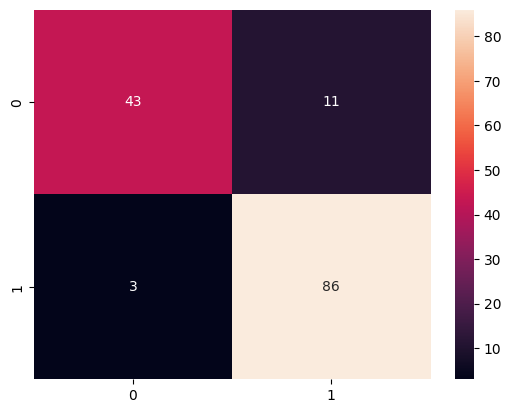

In [206]:
sns.heatmap(matriz, annot=True);